In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv("watertemp.csv")
df.sample(15)

,WaterTemp
6922,25.060
369,22.937
8312,23.380
5046,24.130
5742,24.380
6890,25.500
4690,25.880
9747,23.940
6353,25.690
1390,24.310


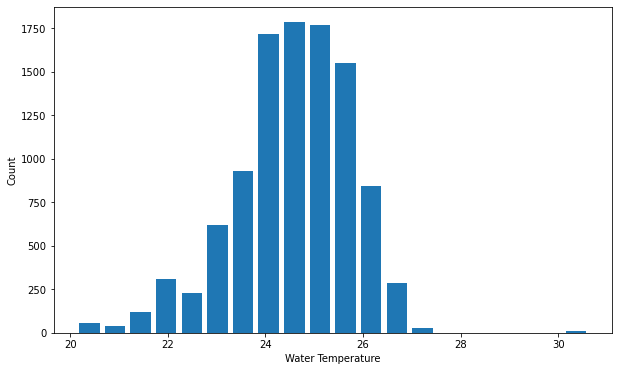

In [3]:
plt.hist(df.WaterTemp, bins=20, rwidth=0.8)
plt.xlabel('Water Temperature')
plt.ylabel('Count')
plt.show()

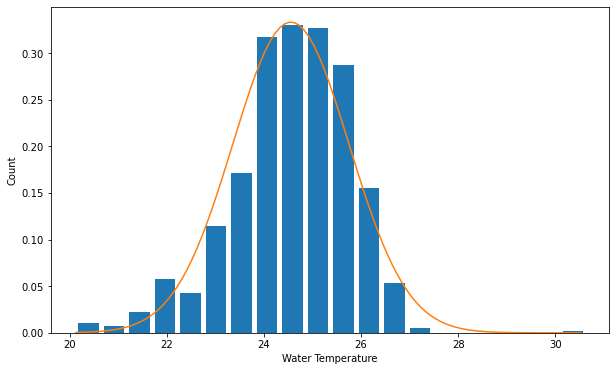

In [4]:
from scipy.stats import norm
import numpy as np
plt.hist(df.WaterTemp, bins=20, rwidth=0.8, density=True)
plt.xlabel('Water Temperature')
plt.ylabel('Count')

rng = np.arange(df.WaterTemp.min(), df.WaterTemp.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.WaterTemp.mean(),df.WaterTemp.std()))

In [5]:
df.WaterTemp.mean()

24.554511076565145

In [6]:
df.WaterTemp.std()

1.197446607080484

In [7]:
df['zscore'] = ( df.WaterTemp - df.WaterTemp.mean() ) / df.WaterTemp.std()
df.head(10)

,WaterTemp,zscore
0,30.500,4.965139
1,30.250,4.756361
2,30.250,4.756361
3,30.562,5.016916
4,30.437,4.912527
5,30.437,4.912527
6,30.312,4.808138
7,30.562,5.016916
8,30.625,5.069528
9,26.000,1.207143


In [29]:
(30.500 - 24.554511076565145)/1.197446607080484


4.965139061966744

In [8]:
df[df['zscore']>3]

,WaterTemp,zscore
0,30.500,4.965139
1,30.250,4.756361
2,30.250,4.756361
3,30.562,5.016916
4,30.437,4.912527
5,30.437,4.912527
6,30.312,4.808138
7,30.562,5.016916
8,30.625,5.069528


In [20]:
df[df['zscore']<-3]

,WaterTemp,zscore
3995,20.94,-3.018515
3996,20.94,-3.018515
3997,20.94,-3.018515
3998,20.94,-3.018515
3999,20.88,-3.068622
...,...,...
4072,20.44,-3.436071
4073,20.44,-3.436071
4074,20.75,-3.177186
4075,20.81,-3.127080


In [9]:
df[(df.zscore<-3) | (df.zscore>3)]

,WaterTemp,zscore
0,30.500,4.965139
1,30.250,4.756361
2,30.250,4.756361
3,30.562,5.016916
4,30.437,4.912527
...,...,...
4072,20.440,-3.436071
4073,20.440,-3.436071
4074,20.750,-3.177186
4075,20.810,-3.127080


In [12]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,WaterTemp,zscore
9,26.000,1.207143
10,26.000,1.207143
11,26.062,1.258920
12,26.062,1.258920
13,26.062,1.258920


In [23]:
df_no_outliers.shape

(10201, 2)

In [24]:
df.shape

(10292, 2)

In [26]:
df.shape[0] - df_no_outliers.shape[0]

91